# Portfolio Project: OKCupid Date-A-Scientist

## Project Author: Carlos Paiva

## Introduction
The objective of this project is to analyze the data from OKCupid, an online dating application, and find patters inside the data provided on the platform by its users similar to the exercise OKCupid does to identify good matches amongst their members. Like OKCupid, many other apps use sophisticated data science techniques to recommend possible matches and to optimize the user experience, and this project will leverage on the vast amount of information that they have access to.

## Scoping
This project will be divided in four sections. First, the overall project goals will be defined as well as the intention of the project. Secondly follows the explanation of the source of the data including a basic description of the information contained within it. Then, the project will describe the analysis, methods and tools used to achieve the project goals. Finally, some conclusions and recommendations will be drawn from the analysis of the obtained results.

### Project Goals
This project has 2 main goals. The first goal is to provide some problem solving, data analysis, and coding skills to the aspiring Data Scientist in the context of the respective Career Path in Codecademy. Second, to answer a critical research question: Can OKCupid's use some variables from the users profile to accurately predict their zodiac sign when this information is not available? Knowing the zodiac sign of each individual is key since many users think that their astrological sign has an important role when choosing a romatic partner.

Therefore, this project defines the problem to solve as the request to build a machine learning model for OKCupid  to predict the missing zodiac signs as accurately as possible, by selecting the dataset variables of more relevance to increase the model accuracy.

### Data
The dataset used for the project analysis (`profiles.csv`) has been provided by Codecademy.com. Before having any modifications from the project side, it contains 59946 rows and 31 columns in csv format, which will be transformed into a dataframe. This dataset contains information about the age, body type, variety of diet, drinking frequency, drugs-consumption frequency, education level, topic of essays 0 to 9, ethnicity, height, income, job, last time online, location, whether they have children or not, sexual orientation, pets, religion, sex, zodiac sign, whether smoker or not, language and current status.

### Analysis
This project will leverage on descriptive statistics and visualization tools to fully understand the data before building 4 different machine learning classification algorithms (K-Nearest Neighbors, Decision Tree, Random Forest, and Naive Bayes) to obtain zodiac sign predictions based of the data from the remaining columns.

### Evaluation
Finally, this project will evaluate the accuracy of the 4 different ML models to select the one with the highest accuracy. Recommendations for improving the study, as well as next steps, will also be mentioned.

## Data
### Project Setup

In [52]:
# Importing basic Python libraries:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Reading csv files as pandas dataframe:
profiles = pd.read_csv('profiles.csv')

# Printing original dataset first 5 rows:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Initial Data Exploration

In [53]:
# Basic characteristics per column:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

The `profiles` dataset has 59946 rows and 31 columns, only 3 of them are numerical (`age`, `height` and `income`). The project will start by getting some statistics about the numerical variables, then proceeding to explore the categorical variables, and even performing some data cleaning in case necessary.

In [54]:
profiles.sign.value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

This column requires some cleaning since there are only 12 signs, luckily it can be noticed that the first word is always the sign. Therefore, a new column with the correct signs, called `sign_OK`, will be created.

In [55]:
# Splitting 'sign' column by space:
str_split = profiles.sign.str.split(' ')
profiles['sign_OK'] = str_split.str.get(0)
profiles.sign_OK.value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_OK, dtype: int64

Since there are so many variables, this project believes it is worth it to analyze and plot it one by one. The firs one will be `sign_OK` as it is the variable that ML model will have to predict.
#### Signs

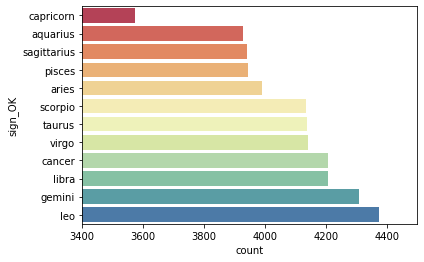

In [56]:
# Using Seaborn bar countplot:
ax = sns.countplot(y=profiles['sign_OK'], order=profiles["sign_OK"].
                   value_counts(ascending=True).index, palette='Spectral')
ax.set(xlim=(3400,4500))
plt.show()

Now starting with the independent variables (the ones used as input data to predict `sign_OK`), the numerical ones will be first:
#### Age, Height, and Income

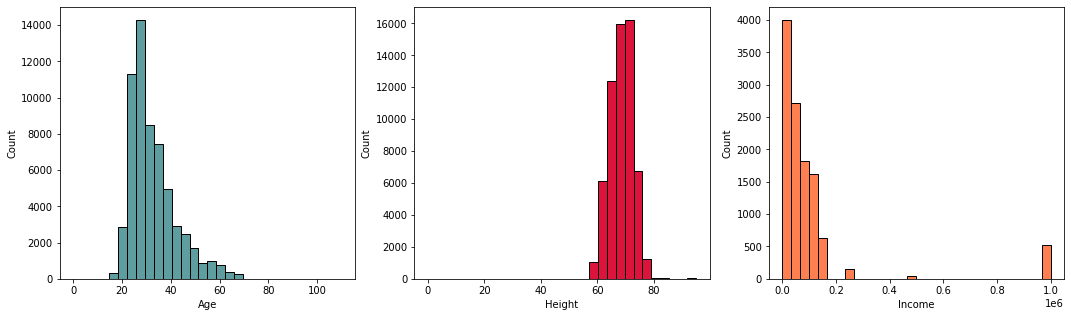

In [57]:
# Using histograms (since this is a numerical continuous variable):
plt.figure(figsize=(18,5))
ax = plt.subplot(1,3,1)
plt.hist(profiles.age, range=(0,110), bins=30, color='cadetblue', edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
ax = plt.subplot(1,3,2)
plt.hist(profiles.height, range=(0,95), bins=30, color='crimson', edgecolor="black")
plt.xlabel("Height")
plt.ylabel("Count")
ax = plt.subplot(1,3,3)
plt.hist(profiles.income, range=(0,1000000), bins=30, color='coral', edgecolor="black")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

In [58]:
# Basic statistics for numerical variables:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


As seen above, there are some outlayers in the data for all 3 variables. For `age` and `height`, it would be wise to eliminate `age` or`'height` as 110 or 1 respectively. `income` does not need any cleaning, as there is a considerable proportion of people that have \~1,000,000 USD income.
#### Body_type

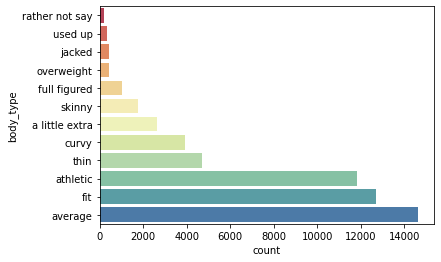

In [59]:
ax = sns.countplot(y=profiles['body_type'], order=profiles["body_type"].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.body_type.value_counts()/len(profiles)

It can be seen that the first 5 categories ('average', 'fit', 'athletic', 'thin', 'curvy') group \~80% of the total data.

#### Diet

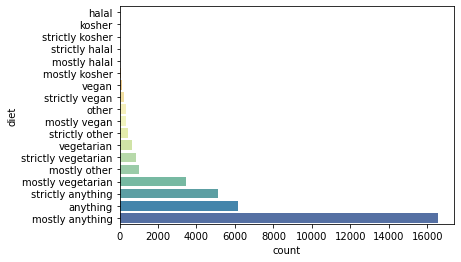

In [60]:
ax = sns.countplot(y=profiles['diet'], order=profiles["diet"].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.diet.value_counts()/len(profiles)

It can be seen that the first 3 categories ('mostly anything', 'anything', 'strictly anything') belong to users who are not so strict with their diets. They group \~46% of the total data.

#### Drinks

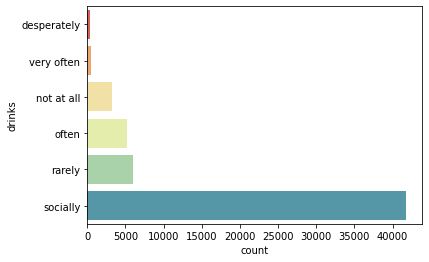

In [61]:
ax = sns.countplot(y=profiles['drinks'], order=profiles["drinks"].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.drinks.value_counts()/len(profiles)

The first category, 'socially', groups \~70% of the data. This indicates that the OKCupid users do not drink much; as 'often', 'very often', and 'desperately' group only \~10% of the data.

#### Drugs

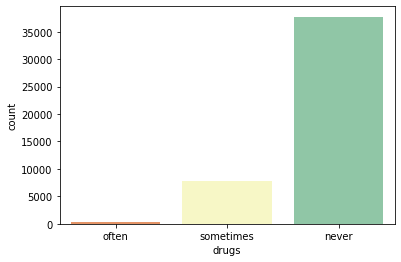

never        0.629300
sometimes    0.128983
often        0.006839
Name: drugs, dtype: float64

In [62]:
ax = sns.countplot(x=profiles['drugs'], order=profiles["drugs"].value_counts(ascending=True).index, palette='Spectral')
plt.show()
profiles.drugs.value_counts()/len(profiles)

The vast majority of the OKCupid users say that they never use drugs (\~63%), yet \~25% did not answer the question.

#### Education

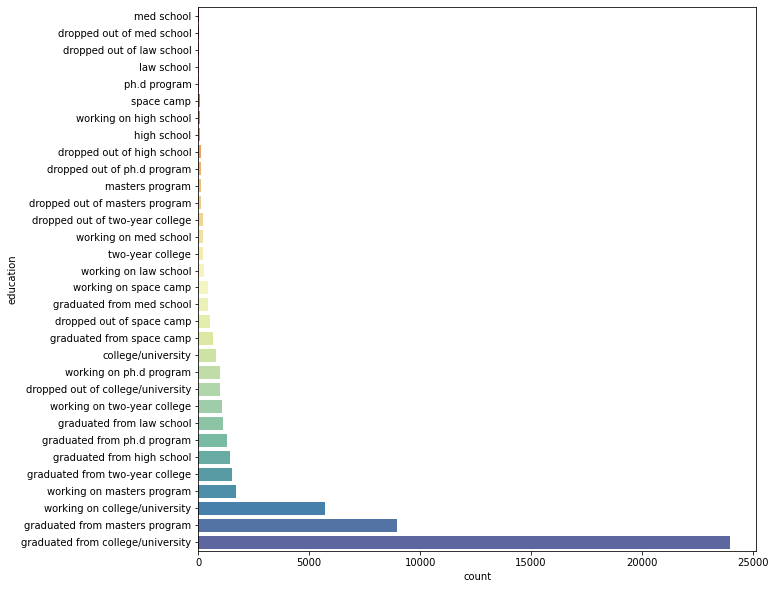

In [63]:
plt.figure(figsize=(10, 10))
ax = sns.countplot(y=profiles['education'], order=profiles['education'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.education.value_counts()/len(profiles)

The biggest category is 'graduated from college/university' which groups 40% of the data.

#### Ethnicity

In [64]:
profiles.ethnicity.value_counts()

white                                                                                               32831
asian                                                                                                6134
hispanic / latin                                                                                     2823
black                                                                                                2008
other                                                                                                1706
                                                                                                    ...  
asian, middle eastern, black, native american, hispanic / latin, white                                  1
asian, middle eastern, indian, hispanic / latin                                                         1
black, native american, pacific islander, white, other                                                  1
asian, middle eastern, black, pacific islander

Since there are 217 different categories in the `ethnicity` variable, for the moment this variable will not be considered for the analysis.

#### Job

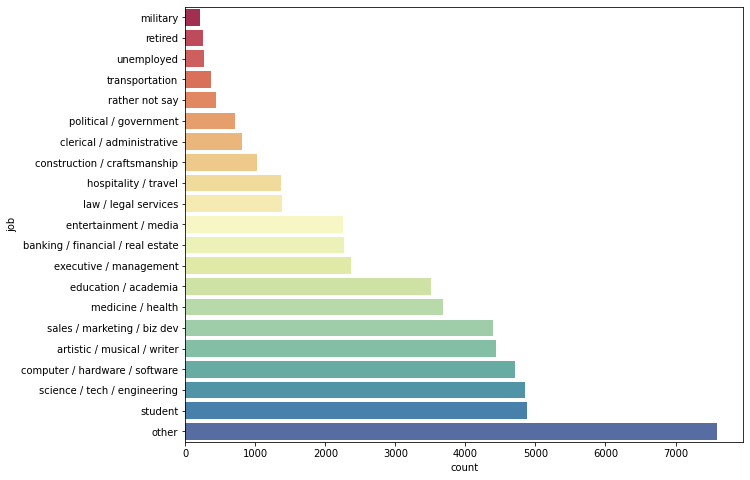

In [65]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(y=profiles['job'], order=profiles['job'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.job.value_counts()/len(profiles)

Job-wise, the data is quite spreaded, being the biggest category 'other' with 13% of the data; and 'student' and 'science / tech / engineering' with 8% of the data.

#### Last online

In [66]:
profiles.last_online.value_counts()/len(profiles)

2012-06-29-22-56    0.000400
2012-06-30-22-09    0.000384
2012-06-30-23-27    0.000384
2012-06-30-22-56    0.000384
2012-06-30-21-51    0.000384
                      ...   
2012-05-28-12-28    0.000017
2012-06-06-20-54    0.000017
2012-06-30-05-50    0.000017
2011-12-25-22-13    0.000017
2012-06-15-23-22    0.000017
Name: last_online, Length: 30123, dtype: float64

Since there are 30123 different categories in the `last_online` variable, this variable will not be considered for the analysis.

#### Location

In [67]:
profiles.location.value_counts()/len(profiles)

san francisco, california      0.518200
oakland, california            0.120342
berkeley, california           0.070263
san mateo, california          0.022203
palo alto, california          0.017749
                                 ...   
cincinnati, ohio               0.000017
nevada city, california        0.000017
leander, texas                 0.000017
oakley, california             0.000017
san luis obispo, california    0.000017
Name: location, Length: 199, dtype: float64

Since there are 199 different categories in the `location` variable, for the moment we will not consider this variable for the analysis.

#### Offspring

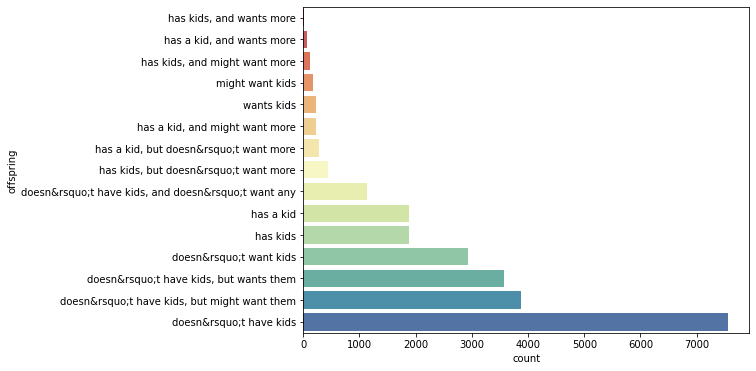

In [68]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(y=profiles['offspring'], order=profiles['offspring'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.offspring.value_counts()/len(profiles)

The first 4 categories group \~30% of the data, corresponding to the users that do not have kids (the majority).

#### Orientation

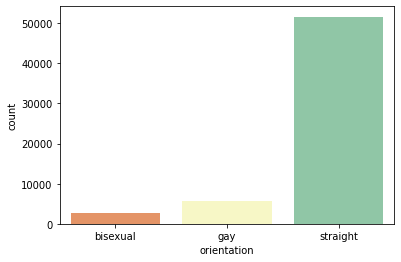

In [69]:
ax = sns.countplot(x=profiles['orientation'], order=profiles['orientation'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.orientation.value_counts()/len(profiles)

The big majority (86% of the total) have declared to be straight.

#### Pets

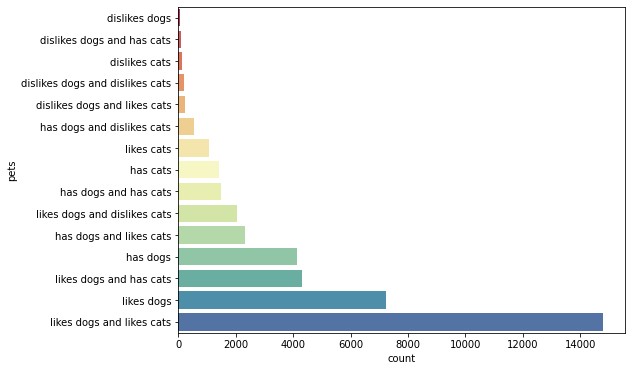

In [70]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(y=profiles['pets'], order=profiles['pets'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.pets.value_counts()/len(profiles)

The majority of users either has dogs or likes dogs (compared to cats).

#### Religion

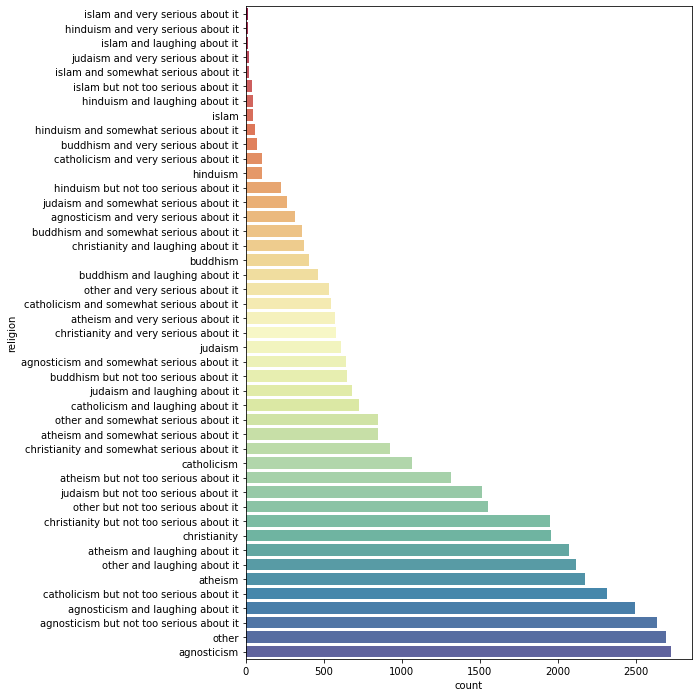

In [71]:
plt.figure(figsize=(8, 12))
ax = sns.countplot(y=profiles['religion'], order=profiles['religion'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.religion.value_counts()/len(profiles)

This data will be cleaned by taking only the first word, as it was done for `sign`.

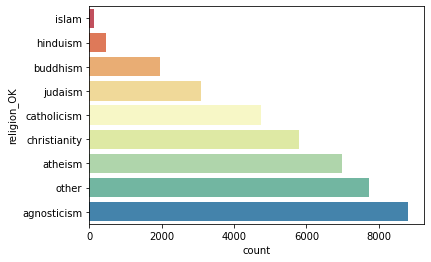

In [72]:
# Splitting 'religion' column by space:
str_split_1 = profiles.religion.str.split(' ')
profiles['religion_OK'] = str_split_1.str.get(0)
# Plotting: 
ax = sns.countplot(y=profiles['religion_OK'], order=profiles['religion_OK'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.religion_OK.value_counts()/len(profiles)

15% of the users declare to be agnostic, and 13% do not declare any religion. Therefore, the majority does not mention affiliation with any religion. The mean age in the dataset is 32 years, which might imply some relationship with the `religion` variable, as younger generations appear less interested in it.

#### Sex

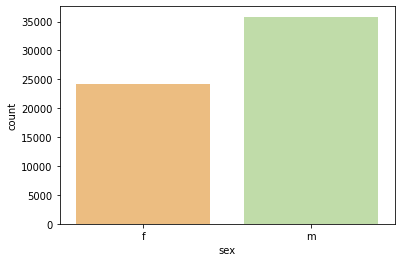

In [73]:
ax = sns.countplot(x=profiles['sex'], order=profiles['sex'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.sex.value_counts()/len(profiles)

60% of the users are male vs 40% who are female.

#### Smokes

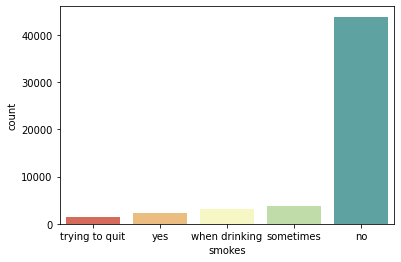

In [74]:
ax = sns.countplot(x=profiles['smokes'], order=profiles['smokes'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.smokes.value_counts()/len(profiles)

More than 73% of the users declares that they do not smoke.

#### Speaks

In [75]:
profiles.speaks.value_counts()

english                                                                      21828
english (fluently)                                                            6628
english (fluently), spanish (poorly)                                          2059
english (fluently), spanish (okay)                                            1917
english (fluently), spanish (fluently)                                        1288
                                                                             ...  
english, spanish (okay), italian (okay), korean (poorly), hebrew (poorly)        1
english (fluently), bengali (fluently), french (fluently), spanish (okay)        1
english (fluently), spanish (poorly), tagalog (okay), french (poorly)            1
english (fluently), tagalog (okay), cebuano (okay)                               1
english (fluently), spanish (okay), bengali (poorly)                             1
Name: speaks, Length: 7647, dtype: int64

Since there are 7647 different categories in the `speaks` variable, this variable will not be considered for the analysis.

#### Status

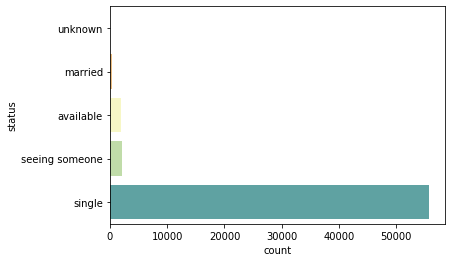

In [76]:
ax = sns.countplot(y=profiles['status'], order=profiles['status'].value_counts(ascending=True).index, palette='Spectral')
plt.show()
# profiles.status.value_counts()/len(profiles)

93% of the total users are 'single', which intuitively sense since this is a dating platform.

### Data Cleaning
Before beginning the analysis and ML classifiers design, this project will prepare/clean the data and create the required subsets. The first step is to identify the missing values in the `profiles` dataset columns (e.g. we notices that in the `drugs` column an important proportion of data was missing).

In [77]:
profiles.isnull().sum()
np.sum(profiles.isnull())

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
sign_OK        11056
religion_OK    20226
dtype: int64

Now, the variables that will be considered to classify the users per zodiac sign can be chosen. The criteria for selecting them is that the variables should be related to the preferences of the users, disregarding the ones that are 'forced' to them by external factors or circumstances, such as `age`, `height` or `education`. A new subset that has only the selected features columns + the label column (`sign_OK`) will be created.

Note: `drugs` and `diet` were not considered due to the huge amount of blanks as per the previous information.

In [78]:
# Defining features, labels and signs list (to index answers):
features_and_labels = ['body_type','orientation','pets','sex','religion_OK',
                       'job','drinks','smokes','sign_OK']
signs = ['capricorn','aquarius','pisces','aries','taurus','gemini','cancer','leo',
         'virgo','libra','scorpio','sagittarius']

# Creating subset (df) with only the corresponding columns:
df = profiles[features_and_labels]

Since the project objective is to predict the `sign` value for the rows that do not have it, we will separate the dataframe in 2 big groups: dataset with sign (`df_with_sign`) and dataset without sign (`df_no_sign`). We will use the first dataset to train and test our models, and the second dataset will be left for trying prediction exercises if the project can find a suitable ML model.

In [79]:
# Creating the mentioned dataframes:
df_with_sign = df[df.sign_OK.notnull()]
df_no_sign = df[df.sign_OK.isnull()]
print(len(df_with_sign), len(df_no_sign))

48890 11056


Then, the rows from each of our subsets that do not have data in the features columns are removed, as the ML models would need this information to make the predictions.

In [80]:
# Dropping rows with empty values:
df_with_sign = df_with_sign.dropna()

# For this df we do not want to drop the empty values for the 'sign_OK' value, because the df would be empty
df_no_sign = df_no_sign.dropna(subset=[n for n in df_no_sign if n != 'sign_OK'])
print(len(df_with_sign), len(df_no_sign), '\n')

# Checking if sample used for analysis will still have representation for all zodiac signs (all OK):
print(df_with_sign.sign_OK.value_counts())

22404 2069 

leo            2033
gemini         2012
virgo          1963
cancer         1920
taurus         1896
scorpio        1876
libra          1862
aries          1819
sagittarius    1794
pisces         1787
aquarius       1774
capricorn      1668
Name: sign_OK, dtype: int64


The selected variables are going to require some work in order to be ready for the models, mainly the creation of dummies to account for the several options available that do not follow a particular order (ordinal).

Features to convert to dummies: `body_type`, `orientation`, `pets`, `religion_OK`, `sex`, `job`, `drinks`, `smokes`.

In [81]:
# Applying One-Hot Encoding:
df_with_sign = pd.get_dummies(data=df_with_sign,
                              columns=['body_type','orientation','pets','religion_OK',
                                       'sex','job','drinks','smokes'])
df_with_sign.head()

,sign_OK,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often,smokes_no,smokes_sometimes,smokes_trying to quit,smokes_when drinking,smokes_yes
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


### Creating training and test sets
The next step is to create the training and test sets for the model from our dataset (`df_with_sign`). These sets should have 2 parts: features and labels.

In [82]:
# Defining features and labels:
features = df_with_sign[[n for n in df_with_sign if n != 'sign_OK']]
labels = df_with_sign['sign_OK']

from sklearn.model_selection import train_test_split

# Defining training and testing data and labels
train_data, test_data, train_labels, test_labels = train_test_split(features, labels, test_size=0.20, 
                                                                    random_state=0)
print('Number of datapoints in train_data, test_data, train_labels, test_labels: ' + 
      str(len(train_data)) + ', ' + str(len(test_data)) + ', ' + 
      str(len(train_labels)) + ', ' + str(len(test_labels)))

# Transforming 'train_labels' and 'test_labels' to 1D horizontal arrays:
train_labels = train_labels.to_numpy().ravel()
test_labels = test_labels.to_numpy().ravel()

Number of datapoints in train_data, test_data, train_labels, test_labels: 17923, 4481, 17923, 4481


## Analysis
### K-Nearest Neighbors
The first model that the project will try is the K-Nearest Neighbors ML Classification Model. Since this model relies heavily on finding the right k-number that maximizes the accuracy score, a plot showing all scores obtained by different k-numbers (from k=1 to 40) will be created to visually select the k that maximizes the score value. Then, this k-number will be used to generate a Classification Report to assess the overall prediction score on the test data (precision, recall and overall f1-score).

In [83]:
#Creating ML K-Nearest Neighbors model:
from sklearn.neighbors import KNeighborsClassifier

k_accuracies = []
for k in range(1,41):
    k_classifier = KNeighborsClassifier(n_neighbors = k)
    k_classifier.fit(train_data, train_labels)
    k_accuracies.append(k_classifier.score(test_data, test_labels))

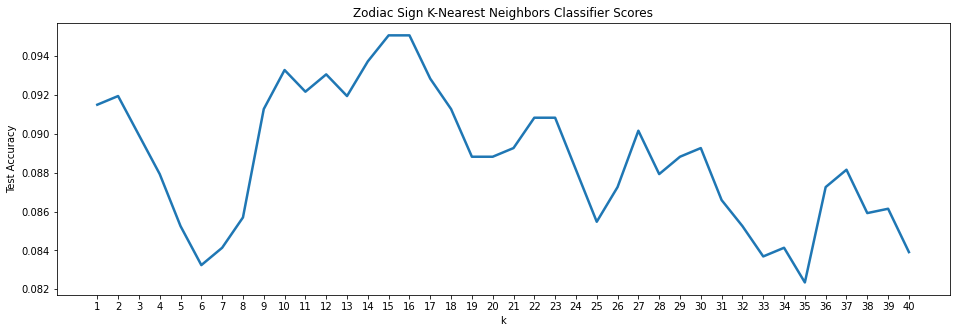

In [84]:
# Plotting accuracy vs k
k_list = range(1,41)
plt.figure(figsize=(16,5))
ax = plt.subplot()
plt.plot(range(len(k_list)), k_accuracies, linewidth=2.5)
ax.set_xticks(range(len(k_list)))
ax.set_xticklabels(k_list)
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.title('Zodiac Sign K-Nearest Neighbors Classifier Scores')
plt.show()

As the graph tells, the maximum score obtained by the model is 9.5% for k=15 when using the model on the test data. By guessing without the help of any ML model, our accuracy would be 8.3% (100%/12 possible outcomes). Therefore, it seems that the KNN model does not increase much the chance of predicting zodiac signs correctly based on the features data. Below the project shows the obtained Classification Report for k=15 to have more information on the precision, recall and f1-score values.

In [85]:
# Obtaining Classification Report for precision, recall and f1-score (using k=15):
from sklearn.metrics import classification_report
k15_classifier = KNeighborsClassifier(n_neighbors = 15).fit(train_data, train_labels)
k15_classifier_predictions = k15_classifier.predict(test_data)
print(classification_report(test_labels, k15_classifier_predictions))

              precision    recall  f1-score   support

    aquarius       0.10      0.17      0.12       346
       aries       0.08      0.13      0.10       353
      cancer       0.12      0.14      0.13       404
   capricorn       0.08      0.07      0.08       334
      gemini       0.11      0.11      0.11       407
         leo       0.09      0.10      0.10       393
       libra       0.11      0.11      0.11       351
      pisces       0.08      0.07      0.08       361
 sagittarius       0.10      0.07      0.09       361
     scorpio       0.09      0.07      0.08       361
      taurus       0.08      0.05      0.06       376
       virgo       0.09      0.05      0.07       434

    accuracy                           0.10      4481
   macro avg       0.09      0.10      0.09      4481
weighted avg       0.09      0.10      0.09      4481



The overall f1-score for the KNN model is around 10% when used for the test data. Overall this model is not recommended for predicting zodiac signs based on the given `profiles` data.

### Decision Tree
Although the KNN Classifier model results were dissapointing, there are still other tools to try. Another option would be to use Decision Trees, which are known to be able to create accurate models for multiclass classification (which is this project's case). As seen before, one of the main challenges here is that we need to classify amongst 12 different options, so trying de Decision Tree ML model might be worth it. The tool will be tested with the same features and labels that were used for the KNN model.

Since this model relies heavily on finding the right amount of branches, the project will test via pruning (changing the max_depth factor) the number of branches that maximizes the accuracy score. For this, a plot chart between accuracy and max_depth will be created.

In [86]:
from sklearn.tree import DecisionTreeClassifier

tree_scores = []
for i in range(1,21):
    tree_classifier = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree_classifier.fit(train_data, train_labels)
    score = tree_classifier.score(test_data, test_labels)
    tree_scores.append(score)

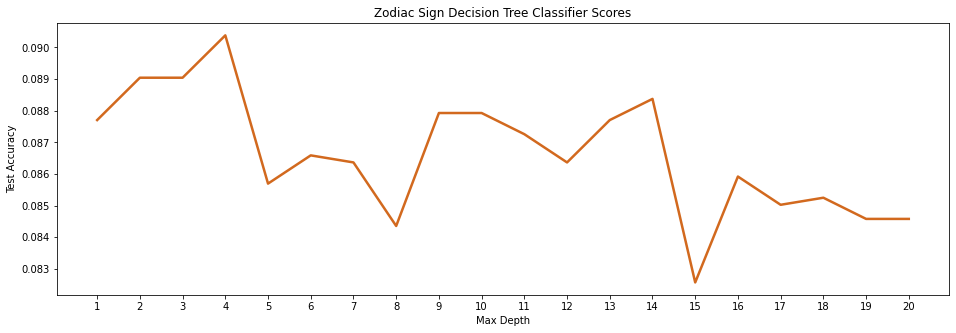

In [87]:
# Plotting accuracy vs k
tree_list = range(1,21)
plt.figure(figsize=(16,5))
ax = plt.subplot()
plt.plot(range(len(tree_list)), tree_scores, linewidth=2.5, color='chocolate')
ax.set_xticks(range(len(tree_list)))
ax.set_xticklabels(tree_list)
plt.xlabel('Max Depth')
plt.ylabel('Test Accuracy')
plt.title('Zodiac Sign Decision Tree Classifier Scores')
plt.show()

The maximum score obtained by the model is 9.1% for max_depth=4 when using the model on the test data. Again, compared with the accuracy of ramdom guessing (8.3%), this model also does not seem to be performing well. Below the project calculated the Classification Report for max_depth=4 to have more information on the precision, recall and f1-score values.

In [88]:
# Obtaining Classification Report for precision, recall and f1-score (using max_depth=4):
from sklearn.metrics import classification_report
tree_classifier = DecisionTreeClassifier(random_state=1, max_depth=4)
tree_classifier.fit(train_data, train_labels)
tree_classifier_predictions = tree_classifier.predict(test_data)
print(classification_report(test_labels, tree_classifier_predictions))

              precision    recall  f1-score   support

    aquarius       0.00      0.00      0.00       346
       aries       0.11      0.00      0.01       353
      cancer       0.08      0.03      0.04       404
   capricorn       0.00      0.00      0.00       334
      gemini       0.09      0.20      0.13       407
         leo       0.09      0.67      0.16       393
       libra       0.00      0.00      0.00       351
      pisces       0.00      0.00      0.00       361
 sagittarius       0.07      0.02      0.03       361
     scorpio       0.00      0.00      0.00       361
      taurus       0.00      0.00      0.00       376
       virgo       0.11      0.09      0.10       434

    accuracy                           0.09      4481
   macro avg       0.05      0.08      0.04      4481
weighted avg       0.05      0.09      0.04      4481



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

The overall f1-score for the Decision Trees model is around 9% when used for the test data. Overall this model is not recommended for predicting zodiac signs based on the given `profiles` data, in fact, it is less accurate than our previous KNN model. Still, the project will give it another go to the Decision Trees powered by Random Forests.

### Random Forest
Despite the fact that the Decision Tree ML model score results were also dissapointing, its low accuracy could be partially related with overfitting. To discard this (and maybe come up with a better model), the project will also try to create a random forest model with 1000 trees (forest large enough to ensure that no overfitting is affecting the model) and setting features bagging to 'sqrt' as standard in ML.

In [89]:
from sklearn.ensemble import RandomForestClassifier

RF_classifier = RandomForestClassifier(n_estimators=1000, random_state=1, max_features='sqrt')
RF_classifier.fit(train_data, train_labels)
RF_score = RF_classifier.score(test_data, test_labels)
print(RF_score)

0.09395224280294577


In [90]:
# Obtaining Classification Report for precision, recall and f1-score (using k=15):
from sklearn.metrics import classification_report
RF_classifier_predictions = RF_classifier.predict(test_data)
print(classification_report(test_labels, RF_classifier_predictions))

              precision    recall  f1-score   support

    aquarius       0.10      0.10      0.10       346
       aries       0.10      0.10      0.10       353
      cancer       0.10      0.11      0.11       404
   capricorn       0.08      0.07      0.07       334
      gemini       0.08      0.08      0.08       407
         leo       0.11      0.13      0.12       393
       libra       0.10      0.11      0.11       351
      pisces       0.11      0.09      0.10       361
 sagittarius       0.10      0.09      0.09       361
     scorpio       0.07      0.06      0.06       361
      taurus       0.09      0.09      0.09       376
       virgo       0.09      0.08      0.09       434

    accuracy                           0.09      4481
   macro avg       0.09      0.09      0.09      4481
weighted avg       0.09      0.09      0.09      4481



As seen above, the predictions did not get more accurate when applying Random Forest (accuracy still \~9%). This project will give it a final shot by implementing the Naive Bayers Classifier to find a better sign prediction tool than to just simply random guessing (accuracy=8.3%).

### Naive Bayes
The Naive Bayes classifier will require a different set of data. Instead of trying to predict zodiac signs based on `body_types`, or `religion`, the project will use the essay columns to find patterns in the text written by the people in each essay to see if the NB ML model can find a better correlation between the words and the users' signs.

First step will be to prepare the data for implementing Naive Bayes.

In [116]:
# Creating function for preparing required datasets:
essay_df = profiles[['essay0', 'sign_OK']]
essay_df = essay_df.dropna()
print(len(essay_df))

# Creating dataframes (1 per sign):
aries_essays = essay_df[essay_df.sign_OK == 'aries']
taurus_essays = essay_df[essay_df.sign_OK == 'taurus']
gemini_essays = essay_df[essay_df.sign_OK == 'gemini']
cancer_essays = essay_df[essay_df.sign_OK == 'cancer']
leo_essays = essay_df[essay_df.sign_OK == 'leo']
virgo_essays = essay_df[essay_df.sign_OK == 'virgo']
libra_essays = essay_df[essay_df.sign_OK == 'libra']
scorpio_essays = essay_df[essay_df.sign_OK == 'scorpio']
sagittarius_essays = essay_df[essay_df.sign_OK == 'sagittarius']
capricorn_essays = essay_df[essay_df.sign_OK == 'capricorn']
aquarius_essays = essay_df[essay_df.sign_OK == 'aquarius']
pisces_essays = essay_df[essay_df.sign_OK == 'pisces']

44796


In [117]:
# Creating lists for model:
aries_text = aries_essays['essay0'].tolist()
taurus_text = taurus_essays['essay0'].tolist()
gemini_text = gemini_essays['essay0'].tolist()
cancer_text = cancer_essays['essay0'].tolist()
leo_text = leo_essays['essay0'].tolist()
virgo_text = virgo_essays['essay0'].tolist()
libra_text = libra_essays['essay0'].tolist()
scorpio_text = scorpio_essays['essay0'].tolist()
sagittarius_text = sagittarius_essays['essay0'].tolist()
capricorn_text = capricorn_essays['essay0'].tolist()
aquarius_text = aquarius_essays['essay0'].tolist()
pisces_text = pisces_essays['essay0'].tolist()

# Combining tweets into 1 list:
text_lists = [aries_text,taurus_text,gemini_text,cancer_text,leo_text,virgo_text,libra_text,
           scorpio_text,sagittarius_text,capricorn_text,aquarius_text,pisces_text]
all_texts = []
labels = []
for i in range(len(text_lists)):
    all_texts += text_lists[i]
    labels += [i]*len(text_lists[i])
print(len(all_texts))
print(len(labels))

44796
44796


In [122]:
# Creating the model:
train_tdata, test_tdata, train_tlabels, test_tlabels = train_test_split(all_texts, labels, 
                                                                    random_state=1, test_size=0.2)
print(len(train_tdata))
print(len(test_tdata))

35836
8960


In [119]:
# Creating and fitting the counter:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()
counter.fit(train_tdata)
train_tcounts = counter.transform(train_tdata)
test_tcounts = counter.transform(test_tdata)

In [120]:
# Creating and fitting the classifier:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(train_tcounts, train_tlabels)
NB_predictions = NB_classifier.predict(test_tcounts)

In [121]:
# Testing the model accuracy:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_tlabels, NB_predictions))

0.09174107142857142


Again, when using the `essay0` column (essay column with the largest amount of data), the project still could not find a model with an accuracy for predicting signs beyond 9%. Regardless of this, some conclusions can be drawn and will be presented in the next section.

## Evaluation
### Conclusions
The goal of this project was to accurately predict the zodiac signs of the OKCupid users by implementing a supervised machine learning classification model. 4 different algorithms were tested (K-Nearest Neighbor, Decision Trees, Random Forests and Naive Bayes classifier), but none of then provided an acceptable improvement to just random guessing the sign without any model.

The model that achieved the highest accuracy on the test dataset was the KNN model (acc=10%). Since this results are not very satisfying, some recommendations to further investigate are given in the next section.

### Recommendations and next steps
The main challenge posed by this project was the requirement of accurately classifying the outcomes in 12 different options (zodiac signs). For this purpose, the provided data did not prove to be enough. The recommendations for increasing the change of finding better predictions models are:
* Increase the provided dataset to provide more data to the model to learn the differences between the features associated with 12 classes
* Reduce the number of classes. It is not possible to reduce the number of zodiac signs, but changing the question to a yes/no binary question (like: is this user a 'libra' or not?) could make things easier for the ML models.

### ML Models not used (and why)
* Logistic Regression: this ML tool works only for classifying between 2 possible outcomes (binary). It is possible to implement (although quite complex) by transforming the problem into a yes/no question for every sign and then comparing the probability that each datapoint has for each sign and choosing the highest one as the model prediction
* Support Vector Machines: similar to Logistic Regression, this is a powerful ML classification tool, but is works only for classifying between 2 classes (binary) and this project needed to classify amongst 12 classes